In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the csv file
df = pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
print('Number of samples:',len(df))

Number of samples: 101766


In [5]:
print('Number of columns:', len(df.columns))

Number of columns: 50


In [6]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# count the number of rows for each type
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [9]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [10]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [11]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
12        3
15       63
16       11
17       14
18     3691
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [12]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [13]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6 

In [14]:
# replace ? with nan
df = df.replace('?',np.nan)

In [15]:
# Numerical features - columns that are numerical
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [16]:
# check if there any missing values in the numerical data
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [17]:
# categorical feature - these are all non-numeric data
cols_cat = ['race','gender','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide',
           'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide',
           'pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
           'tolazamide','insulin','glyburide-metformin','glipizide-metformin',
           'glimepiride-pioglitazone','metformin-rosiglitazone', 
            'metformin-pioglitazone','change','diabetesMed','payer_code']

In [18]:
# check if there are any missing data
df[cols_cat].isnull().sum()

race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
dtype: int64

In [19]:
# These three attributes contained missing data so we just add another function
df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

In [20]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [21]:
# consider 10 top specialist and other category
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [22]:
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

In [23]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df[cols_cat_num] = df[cols_cat_num].astype('str')

In [24]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

In [25]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# To add the one-hot coding columns to the data frame use cancat()
df = pd.concat([df,df_cat], axis = 1)

In [27]:
# save the column names for categorical data
cols_all_cat = list(df_cat.columns)

In [28]:
# extra features
df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [29]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [30]:
# let's map these t0 0-9 for the numerical data
age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

In [31]:
df.weight.notnull().sum()

3125

In [32]:
df['has_weight'] = df.weight.notnull().astype('int')

In [33]:
cols_extra = ['age_group','has_weight']

In [34]:
# engineering feature summary
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 143
Numerical Features: 8
Categorical Features: 133
Extra features: 2


In [35]:
# check if we are missing any data
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital               0
discharge_disposition_id_16    0
admission_type_id_6            0
admission_type_id_7            0
admission_type_id_8            0
discharge_disposition_id_10    0
discharge_disposition_id_12    0
discharge_disposition_id_15    0
discharge_disposition_id_17    0
admission_type_id_4            0
dtype: int64

In [36]:
# let us make new dataframe that only has the column of interest
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use + ['OUTPUT_LABEL']]

In [37]:
df_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,OUTPUT_LABEL
0,1,41,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,1,10,0,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,1,20,0,0
3,2,44,1,16,0,0,0,7,0,1,...,0,0,0,0,0,0,1,30,0,0
4,1,51,0,8,0,0,0,5,0,1,...,0,0,0,0,0,0,1,40,0,0


In [38]:
df_data.shape

(99343, 144)

In [39]:
x=df_data.drop('OUTPUT_LABEL',axis=1)

In [40]:
x.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight
0,1,41,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3,59,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,0,1,10,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,0,1,20,0
3,2,44,1,16,0,0,0,7,0,1,...,0,0,0,0,0,0,0,1,30,0
4,1,51,0,8,0,0,0,5,0,1,...,0,0,0,0,0,0,0,1,40,0


In [41]:
y=df_data['OUTPUT_LABEL']

In [42]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: OUTPUT_LABEL, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=0)

In [44]:
# Confusion matrix creation
import numpy as np
import pandas as pd
import sklearn.metrics as metrics                                                 
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Decision Tree

Accuracy:79.64860907759883
Precision: 0.163
Recall : 0.163
F1_score : 0.163
Confusion matrix, without normalization


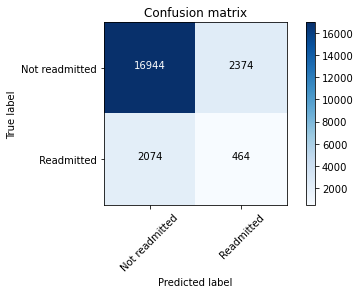

In [45]:
from sklearn.tree import DecisionTreeClassifier
m3=DecisionTreeClassifier()
m3.fit(x_train,y_train)
Accuracy=m3.score(x_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m3.predict(x_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall : %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import f1_score
print('F1_score : %.3f' % precision_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not readmitted',' Readmitted'])

# Random Forest

Accuracy:88.42880673499268
Precision: 0.615
Recall : 0.615
F1_score : 0.615
Confusion matrix, without normalization


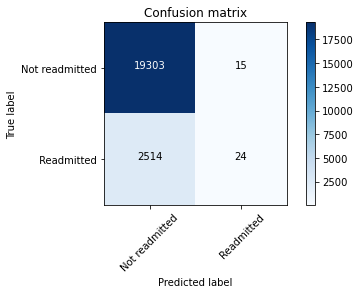

In [46]:
from sklearn.ensemble import RandomForestClassifier
m4=RandomForestClassifier()
m4.fit(x_train,y_train)
Accuracy=m4.score(x_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m4.predict(x_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall : %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import f1_score
print('F1_score : %.3f' % precision_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not readmitted',' Readmitted'])

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:88.3876281112738
Precision: 0.615
Recall : 0.615
F1_score : 0.615
Confusion matrix, without normalization


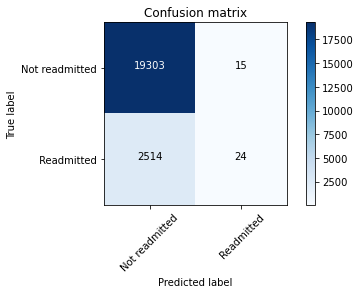

In [48]:
m1=LogisticRegression()
m1.fit(x_train,y_train)
Accuracy=m1.score(x_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m4.predict(x_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall : %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import f1_score
print('F1_score : %.3f' % precision_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not readmitted',' Readmitted'])

# Naive Bayes

Accuracy:13.378477306002928
Precision: 0.615
Recall : 0.615
F1_score : 0.615
Confusion matrix, without normalization


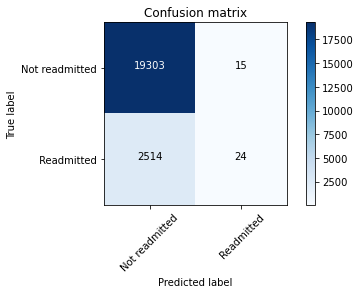

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
Accuracy=classifier.score(x_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))
y_pred=m4.predict(x_test)
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import recall_score
print('Recall : %.3f' % precision_score(y_test, y_pred))
from sklearn.metrics import f1_score
print('F1_score : %.3f' % precision_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not readmitted',' Readmitted'])